In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

**1. Load the data file.**

In [2]:

df=pd.read_csv("hour.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.shape

(17379, 17)

In [5]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

**2. Check for null values in the data and drop records with NAs.**

In [7]:
df_missing=df.isna()

In [8]:
for c in df_missing.columns.values.tolist():
    print (c)
    print(df_missing[c].value_counts())

instant
False    17379
Name: instant, dtype: int64
dteday
False    17379
Name: dteday, dtype: int64
season
False    17379
Name: season, dtype: int64
yr
False    17379
Name: yr, dtype: int64
mnth
False    17379
Name: mnth, dtype: int64
hr
False    17379
Name: hr, dtype: int64
holiday
False    17379
Name: holiday, dtype: int64
weekday
False    17379
Name: weekday, dtype: int64
workingday
False    17379
Name: workingday, dtype: int64
weathersit
False    17379
Name: weathersit, dtype: int64
temp
False    17379
Name: temp, dtype: int64
atemp
False    17379
Name: atemp, dtype: int64
hum
False    17379
Name: hum, dtype: int64
windspeed
False    17379
Name: windspeed, dtype: int64
casual
False    17379
Name: casual, dtype: int64
registered
False    17379
Name: registered, dtype: int64
cnt
False    17379
Name: cnt, dtype: int64


*There doesn't seem to be any NA values to drop*

In [9]:
df.shape

(17379, 17)

In [10]:
df.dropna(inplace=True)
df.shape # Shape is the same

(17379, 17)

**3. Sanity checks:**

3.1 Check if registered + casual = cnt for all the records. If not, the row is junk and should be dropped.

In [11]:
condition=df["registered"]+df["casual"]!=df["cnt"]

df[condition].shape # no junk rows to drop

(0, 17)

3.2 Month values should be 1-12 only

In [12]:
df["mnth"].describe() # min is 1, max is 12

count    17379.000000
mean         6.537775
std          3.438776
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: mnth, dtype: float64

In [13]:
# double checking 

condition1=(df["mnth"]<1) | (df["mnth"]>12)

df[condition1] # no records beyond this range

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


3.3 Hour values should be 0-23

In [14]:
condn=(df["hr"]<0) |(df["hr"]>23)
df[condn] # no records outside 0-23

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


**Step 4**

The variables ‘casual’ and ‘registered’ are redundant and need to be dropped. 

In [15]:
inp1=df.drop(["casual","registered"], inplace=False,axis=1)

In [16]:
inp1.shape # columns were dropped

(17379, 15)

‘Instant’ is the index and needs to be dropped too.
The date column dteday will not be used in the model building, and therefore needs to be dropped.

In [17]:
inp1.drop(["instant","dteday"],inplace=True,axis=1)

In [18]:
inp1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


**5. Univariate Analysis**

Describe the numerical fields in the dataset using pandas describe method.

In [19]:
inp1.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


Make density plot for temp. This would give a sense of the centrality and the spread of the distribution.

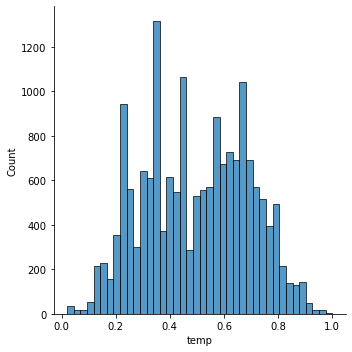

In [20]:
sns.displot(inp1["temp"])
plt.show()

Boxplot for atemp 

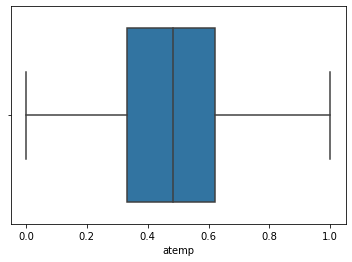

In [21]:
sns.boxplot(x="atemp",data=inp1)
plt.show()

Are there any outliers?  
*No, there don't seem to be any extreme outliers*

Histogram for hum

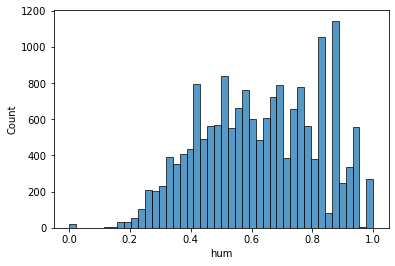

In [22]:
sns.histplot(inp1["hum"])
plt.show()

Do you detect any abnormally high values?  
*There are around 200 rows that report an humidity of 1.0 (100 %), which seems strange but could be valid*

Density plot for windspeed

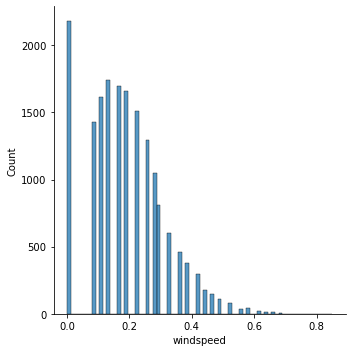

In [23]:
sns.displot(x="windspeed",data=inp1)
plt.show()

Box and density plot for cnt – this is the variable of interest 

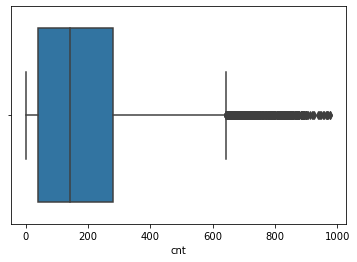

In [24]:
sns.boxplot(x="cnt",data=inp1)
plt.show()

Do you see any outliers in the boxplot?   
*Yes, there are many outliers ranging from the 600 to 1000 + range*

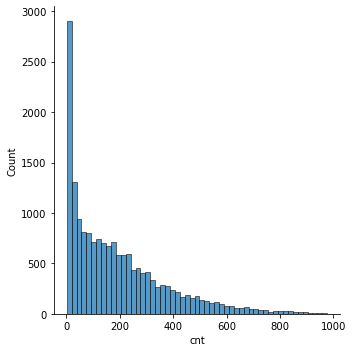

In [25]:
sns.displot(x="cnt",data=inp1)
plt.show()

Does the density plot provide a similar insight?  
*Yes, it also indicates outliers at the same range specified above*

**6. Outlier treatment**  

Cnt looks like some hours have rather high values. 
You’ll need to treat these outliers so that they don’t skew the analysis and the model. 

Find out the following percentiles: 10, 25, 50, 75, 90, 95, 99

In [26]:
inp1["cnt"].quantile([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

Decide the cutoff percentile and drop records with values higher than the cutoff. Name the new dataframe as inp2.

In [27]:
# cut off percentile is 90
condn1=inp1["cnt"]>inp1["cnt"].quantile([0.90]).iloc[0]
inp2=inp1.drop(df[condn1].index,inplace=False,axis=0)

In [28]:
inp1.shape, inp2.shape ## rows with cnt beyond the 90th percentile have been dropped

((17379, 13), (15641, 13))

**7. Bivariate analysis**

Make boxplot for cnt vs. hour

In [29]:
inp2.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

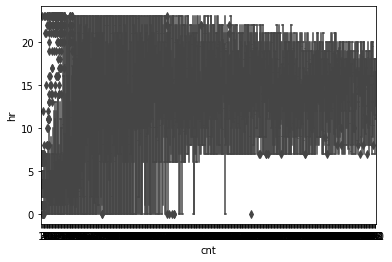

In [30]:
sns.boxplot(x="cnt",y="hr",data=inp2)
plt.show()

In [31]:
cnt_hr_plot=inp2[["cnt","hr"]]

cnt_hr_plot.head()


,cnt,hr
0,16,0
1,40,1
2,32,2
3,13,3
4,1,4


In [32]:
cnt_hr_plot=cnt_hr_plot.set_index("cnt")

In [33]:
cnt_hr_plot.head()

,hr
cnt,
16,0
40,1
32,2
13,3
1,4


In [34]:
#cnt_hr_plot=cnt_hr_plot.transpose()

In [35]:
cnt_hr_plot.head()

,hr
cnt,
16,0
40,1
32,2
13,3
1,4


<AxesSubplot:>

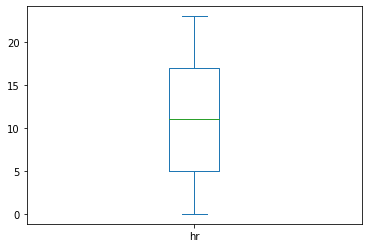

In [36]:
cnt_hr_plot.plot(kind="box")

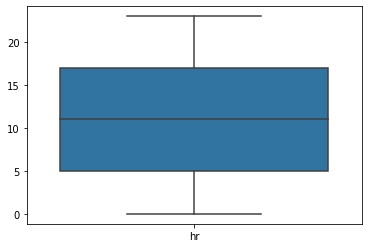

In [38]:
sns.boxplot(data=cnt_hr_plot)
plt.show()